In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import requests


In [ ]:
# Step 2: Load the dataset from the provided JSON URL
url = "https://flipsidecrypto.xyz/api/v1/queries/2bfb215b-2b5c-4781-a2de-b2774f048033/data/latest"

# Fetch JSON data using requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    df_original = pd.DataFrame(data)
else:
    print("Failed to fetch data. Status code:", response.status_code)

print(df_original.columns)

Index(['TRADER', 'TRADE_COUNT', 'PERP_TRADE_COUNT', 'SPOT_TRADE_COUNT',
       'LONG_COUNT', 'SHORT_COUNT', 'TOTAL_USD_VOLUME', 'AVG_USD_TRADE_SIZE',
       'TOTAL_FEE_AMOUNT', 'DEFI_INTERACTIONS'],
      dtype='object')


In [ ]:
# Step 3: Data preprocessing: Standardize the data
scaler = StandardScaler()
# Exclude the 'trader' column before standardizing the data
scaled_data = scaler.fit_transform(df_original.drop(columns=['TRADER']))

# Display the first few rows of the scaled data
print(scaled_data[:5])

[[-0.06202897 -0.06256972 -0.04281705 -0.06285858 -0.06266132 -0.06419809
  -0.53235533 -0.03102423 -0.16017678]
 [-0.06202897 -0.06256972 -0.04281705 -0.06285858 -0.06266132 -0.06419809
  -0.53235529 -0.03096304 -0.16017678]
 [-0.06207447 -0.06262663 -0.04040062 -0.06288696 -0.06271828 -0.06419809
  -0.52170782 -0.03107787 -0.16017678]
 [-0.06207447 -0.06262663 -0.04040062 -0.06288696 -0.06271828 -0.06419808
  -0.52143833 -0.03107904 -0.16017678]
 [-0.06201381 -0.06262663 -0.0307349  -0.06285858 -0.06263284 -0.06419808
  -0.5329968  -0.03105701 -0.16017678]]


In [ ]:
# Step 4: Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

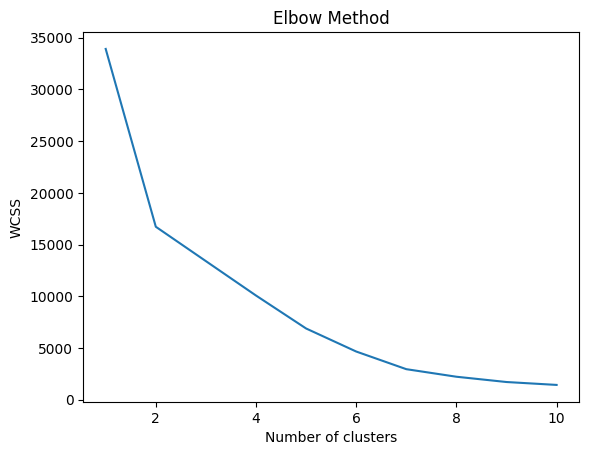

In [ ]:
# Step 5: Plotting the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Step 6: Initialize and fit the KMeans model

## From the elbow method, select the optimal number of clusters

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(scaled_data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [ ]:
# Step 7: Add the cluster labels to the original DataFrame
df_original['Cluster'] = kmeans.labels_

In [ ]:
# Step 8: Analyze the characteristics of each cluster

# Drop the 'TRADER' column before analyzing the characteristics of each cluster
data_for_analysis = df_original.drop(columns=['TRADER'])

# Analyze the characteristics of each cluster
cluster_means = data_for_analysis.groupby('Cluster').mean()
cluster_sizes = data_for_analysis['Cluster'].value_counts()

# Print the characteristics of each cluster along with the size of each cluster
for cluster_label, cluster_mean in cluster_means.iterrows():
    print(f"\nCluster {cluster_label}:\n{cluster_mean}")
    print(f"Size of Cluster {cluster_label}: {cluster_sizes[cluster_label]}")



Cluster 0:
TRADE_COUNT           6.712650e+02
PERP_TRADE_COUNT      7.446195e+02
SPOT_TRADE_COUNT      8.402774e+00
LONG_COUNT            3.767651e+02
SHORT_COUNT           3.762572e+02
TOTAL_USD_VOLUME      2.089223e+06
AVG_USD_TRADE_SIZE    2.487861e+03
TOTAL_FEE_AMOUNT      1.516268e+02
DEFI_INTERACTIONS     0.000000e+00
Name: 0, dtype: float64
Size of Cluster 0: 3461

Cluster 1:
TRADE_COUNT           1.050392e+06
PERP_TRADE_COUNT      1.117270e+06
SPOT_TRADE_COUNT      7.596364e+02
LONG_COUNT            5.614306e+05
SHORT_COUNT           5.565987e+05
TOTAL_USD_VOLUME      3.807397e+09
AVG_USD_TRADE_SIZE    3.685767e+03
TOTAL_FEE_AMOUNT      2.588978e+04
DEFI_INTERACTIONS     0.000000e+00
Name: 1, dtype: float64
Size of Cluster 1: 11

Cluster 2:
TRADE_COUNT           9.134234e+01
PERP_TRADE_COUNT      1.639820e+02
SPOT_TRADE_COUNT      3.231532e+01
LONG_COUNT            1.004505e+02
SHORT_COUNT           9.584685e+01
TOTAL_USD_VOLUME      1.451786e+06
AVG_USD_TRADE_SIZE    2.910945

In [ ]:
# Concatenate cluster_means DataFrame and cluster_sizes Series into a single DataFrame
cluster_analysis = pd.concat([cluster_means, cluster_sizes.rename('Cluster Size')], axis=1)

# Transpose the concatenated DataFrame
cluster_analysis_transposed = cluster_analysis.T

# Set the display format for floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)

# Print the transposed DataFrame
print(cluster_analysis_transposed)

Cluster                     0             1          2             3  \
TRADE_COUNT            671.26    1050392.27      91.34    1530730.00   
PERP_TRADE_COUNT       744.62    1117269.73     163.98    1680017.00   
SPOT_TRADE_COUNT         8.40        759.64      32.32         76.00   
LONG_COUNT             376.77     561430.64     100.45     847982.00   
SHORT_COUNT            376.26     556598.73      95.85     832111.00   
TOTAL_USD_VOLUME   2089222.61 3807396924.75 1451786.19 4566489550.15   
AVG_USD_TRADE_SIZE    2487.86       3685.77    2910.94       2718.00   
TOTAL_FEE_AMOUNT       151.63      25889.78     265.02     948144.65   
DEFI_INTERACTIONS        0.00          0.00       1.26          0.00   
Cluster Size          3461.00         11.00     111.00          1.00   

Cluster                     4          5  
TRADE_COUNT             13.04    2289.00  
PERP_TRADE_COUNT        84.32       0.00  
SPOT_TRADE_COUNT         9.77   23869.00  
LONG_COUNT              48.42    40

In [ ]:
# Step 9: PCA Analaysis

# Set the desired variance ratio for PCA
desired_variance_ratio=0.95

# Initialize PCA with the desired variance ratio and svd_solver='full'
pca = PCA(n_components=desired_variance_ratio,svd_solver='full')

# Transform the scaled data using PCA
pc_vars = pca.fit_transform(scaled_data)

# Print the size of the original scaled data and the transformed data
print(f'size scaled_data: {np.shape(scaled_data)}')
print(f'size pc_vars: {np.shape(pc_vars)}')

size scaled_data: (3767, 9)
size pc_vars: (3767, 5)


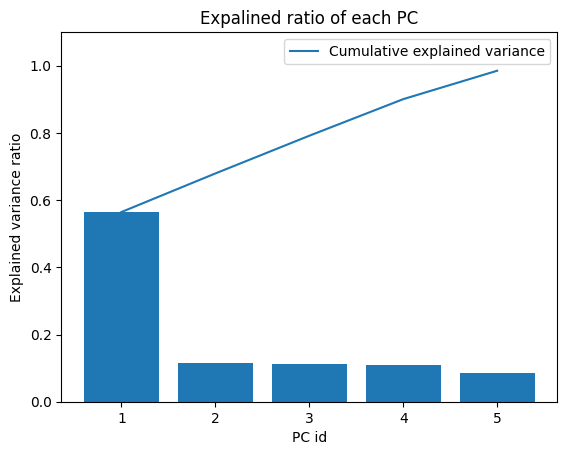

In [ ]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio and the explained variance ratio for each principal component
fig, ax = plt.subplots(1,1)
x_range = range(1,np.shape(pc_vars)[1]+1)
ax.plot(x_range, explained_variance_ratio.cumsum(), label='Cumulative explained variance')
ax.set_title('Expalined ratio of each PC')
ax.set_xlabel('PC id')
ax.set_ylabel('Explained variance ratio')
ax.legend(loc='upper right')
ax.bar(x_range, explained_variance_ratio)
ax.set_ylim(0, 1.1)
plt.show()

In [ ]:
# Print the explained variance ratio for each principal component
print(explained_variance_ratio)

[0.56455562 0.11479198 0.11225272 0.10890427 0.0845642 ]


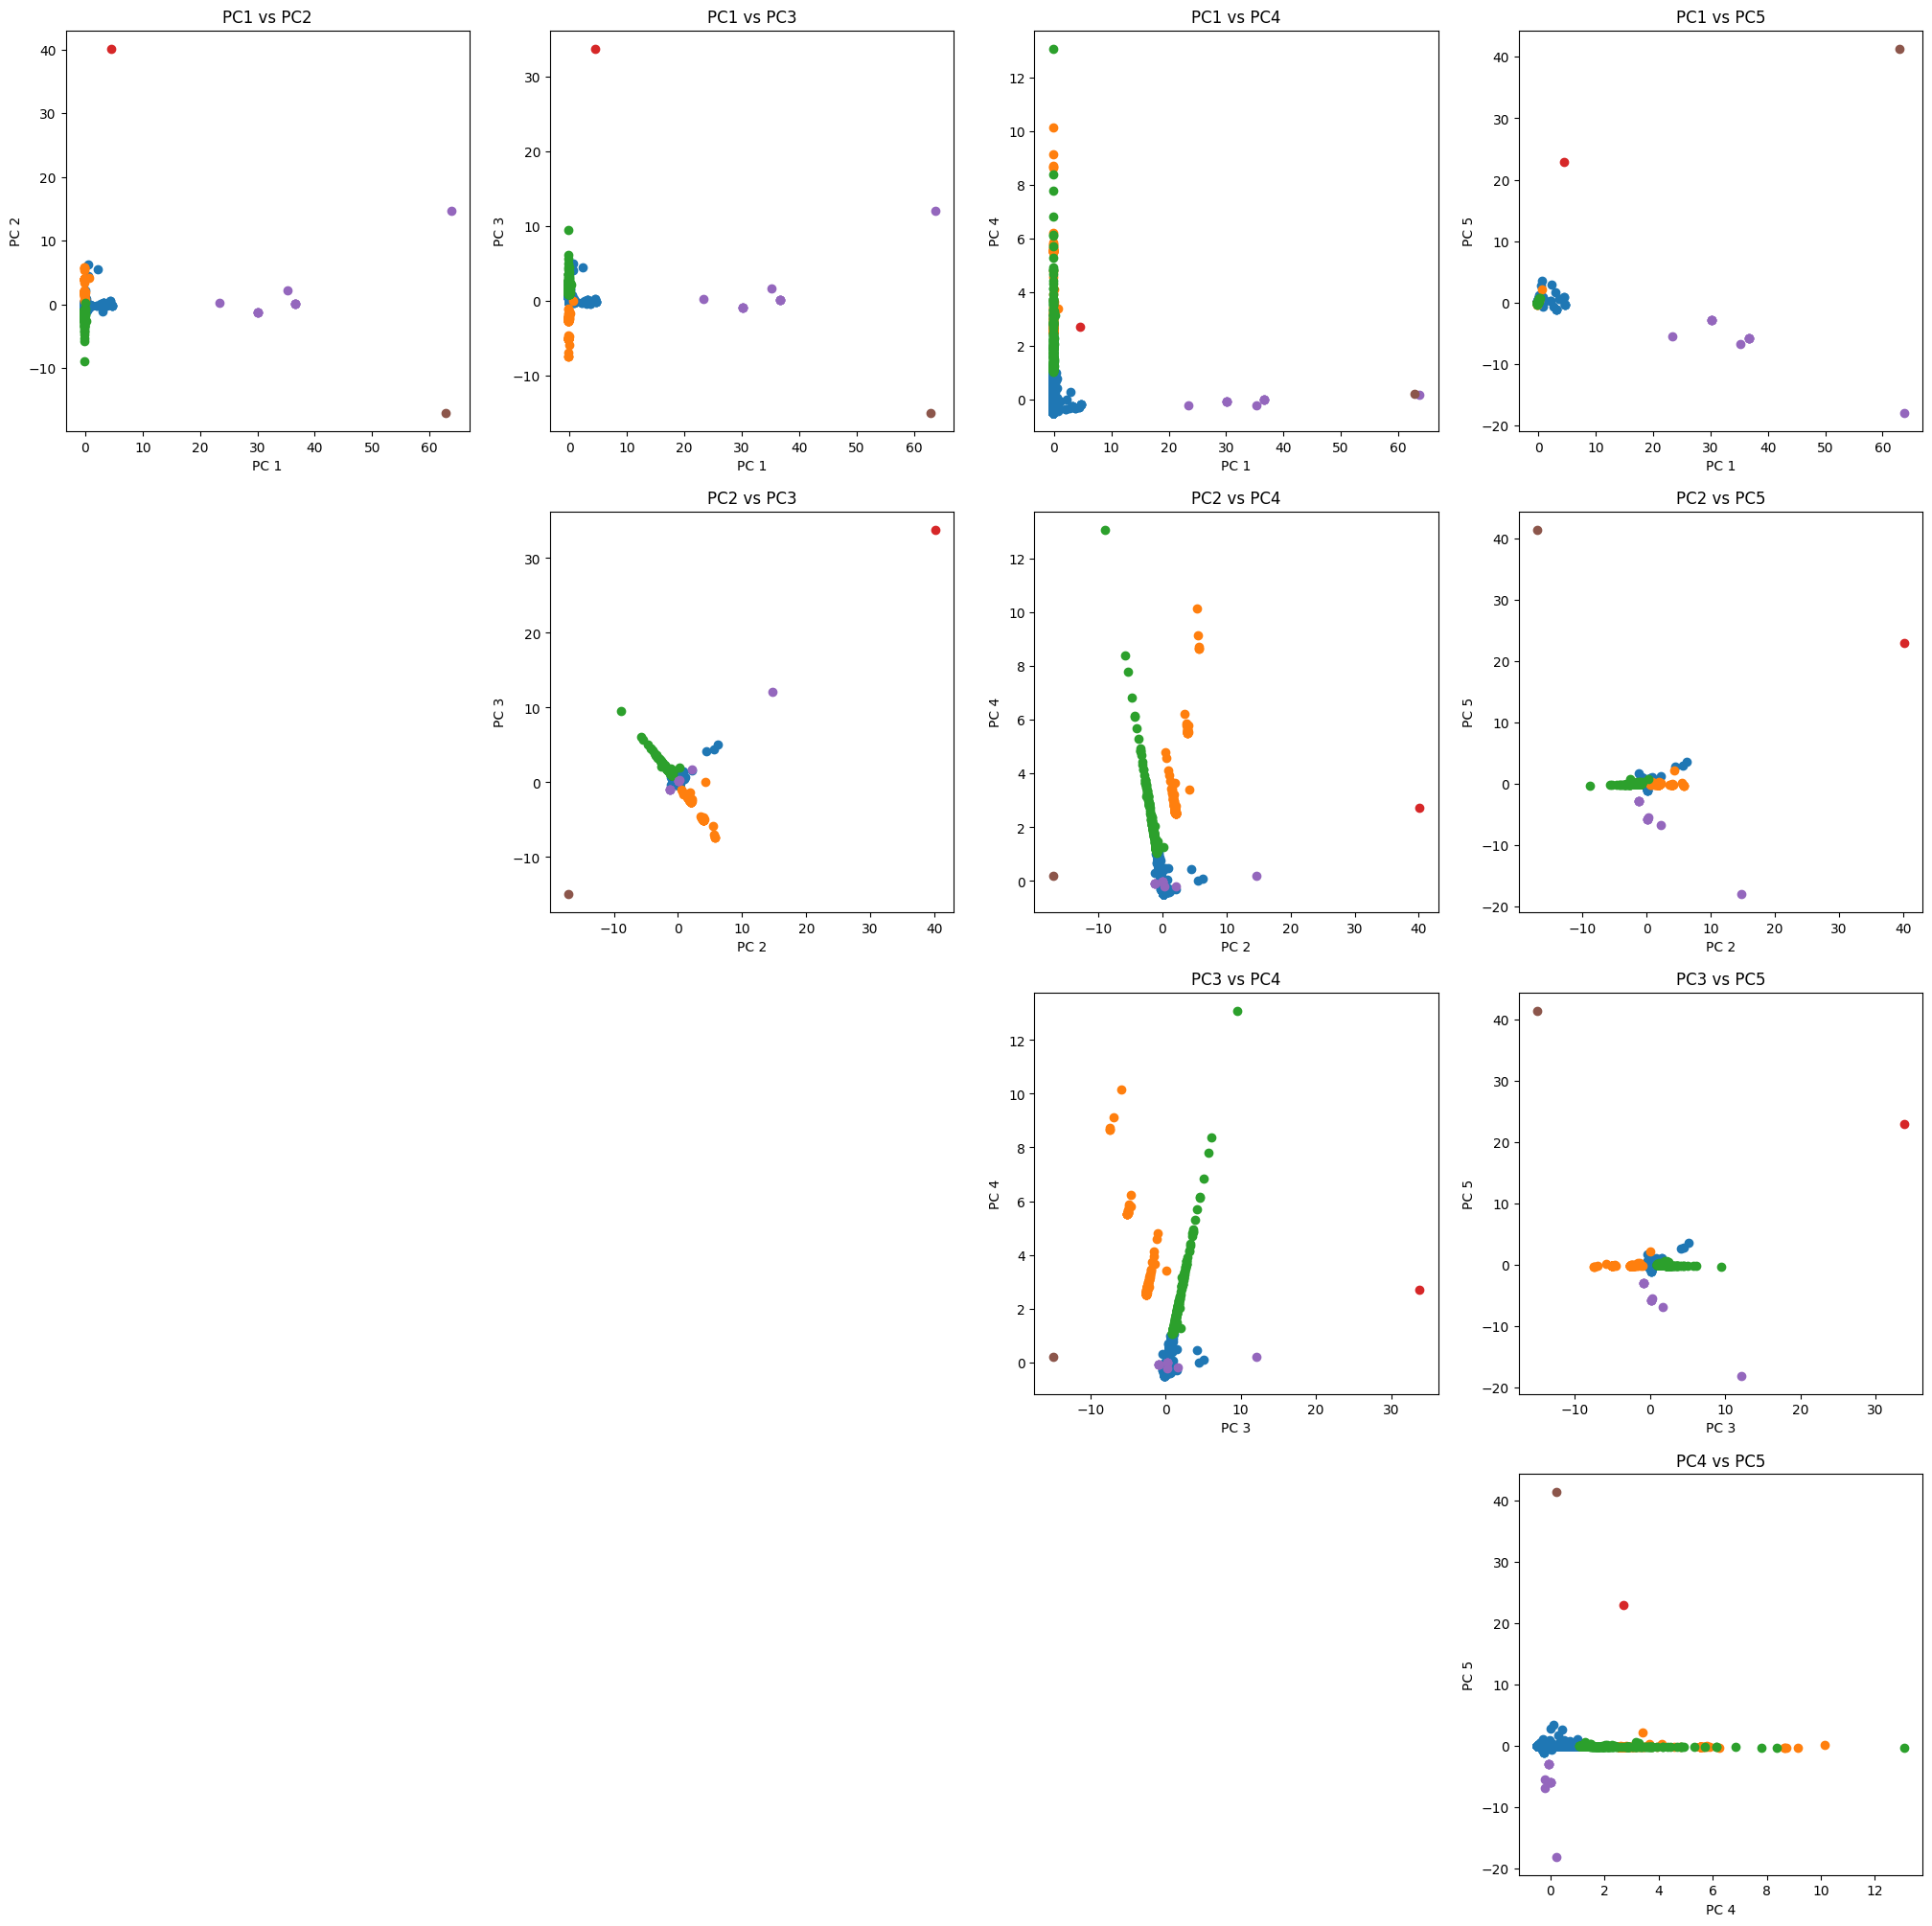

In [ ]:
# Create a DataFrame containing the principal components and cluster labels
num_pcs = np.shape(pc_vars)[1]
pca_df = pd.DataFrame(data=pc_vars,columns=[f'PC{i}'for i in range(1,num_pcs+1)])
pca_df['Cluster'] = kmeans.labels_

# Create scatter plots for each pair of principal components
u_labels = pca_df['Cluster'].unique()
fig, axes = plt.subplots(num_pcs-1, num_pcs-1, figsize=(5*num_pcs, 5*num_pcs))
axes = axes.flatten()
for x_axes in range(0,num_pcs-1):
  for y_axes in range(1,num_pcs):
    ax = axes[(num_pcs-1)*(x_axes) + y_axes-1]
    if y_axes > x_axes:
      for i in u_labels:
        ax.scatter(pca_df[pca_df['Cluster']==i].iloc[:, x_axes], pca_df[pca_df['Cluster']==i].iloc[:, y_axes])
      ax.set_title(f'PC{x_axes+1} vs PC{y_axes+1}')
      ax.set_xlabel(f'PC {x_axes+1}')
      ax.set_ylabel(f'PC {y_axes+1}')
    else:
      ax.axis('off')

In [ ]:
# Step 10: Save the Results

from google.colab import drive
# Save the DataFrame to a CSV file in the Colab runtime environment
df_original.to_csv("clustered_trader_data.csv", index=False)

# Download the CSV file from Colab to the local device
from google.colab import files
files.download("clustered_trader_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>